# Лабораторная работа 4: Машина опорных векторов (SVM)
## Балакиревой Дарьи НПМбд-01-19б

<img src="svm_img.png" width=350>

Результат лабораторной работы — **отчет**. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Нам не интересен ваш код. Чем меньше кода, тем лучше всем: нам — меньше проверять, вам — проще найти ошибку или дополнить эксперимент.

Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Ответы на вопросы должны быть полными, четкими и хорошо аргументированными.

## 1. Квадратичное программирование и QP-солвер

Квадратичное программирование (QP) — специальный тип задач математической оптимизации, заключающийся в нахождении точки минимума неотрицательно-определенной квадратичной формы (многомерная парабола) в присутствии линейных ограничений:
$$
\begin{gather}
    \frac{1}{2}\boldsymbol x^T\boldsymbol P\boldsymbol x + \boldsymbol q^T\boldsymbol x \to \min_{\boldsymbol x} \\
    \begin{aligned}
        \text{s.t.} \quad & \boldsymbol G\boldsymbol x \le \boldsymbol h \\
        & \boldsymbol A\boldsymbol x = \boldsymbol b
    \end{aligned}
\end{gather}
$$

Здесь $\boldsymbol P$ — симметричная матрица. В ограничениях $\boldsymbol G\boldsymbol x \le \boldsymbol h$ и $\boldsymbol A\boldsymbol x = \boldsymbol b$ под знаками равенства и неравенства подразумевается сравнение всех компонент векторов.

Задача квадратичного программирования хорошо изучена, существуют эффективные алгоритмы для ее решения. Имеется множество библиотек с солверами для задачи QP, вот некоторые из них:
 - [CVXOPT](http://cvxopt.org/) (свободно-распространяемая, Python) **рекомендуется к использованию**
 - [Mosek](https://www.mosek.com/) (коммерческая с возможностью получения академической лицензии, C, Java, MATLAB, .NET, R, Python)
 - [Matlab Optimization Toolbox](http://www.mathworks.com/help/optim/ug/quadprog.html) 

#### Задание

1. Установите QP-солвер, разберитесь с его интерфейсом.
2. Протестируйте солвер, решив простую задачу оптимизации в двумерном пространстве:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$
3. Какие из ограничений-неравенств задачи являются _активными_, т.е. влияют на точку оптимума, а какие ограничения можно выбросить и точка оптимума не поменяется?

In [2]:
!pip install cvxopt

In [3]:
import numpy as np
import cvxopt 
from cvxopt import matrix
from cvxopt import solvers

In [4]:
P = matrix(np.diag([2, 8]), tc = 'd')
q = matrix(np.array([-8, -16]), tc = 'd')
G = matrix(np.array([[1, 1], [1, 0], [-1, 0], [0, -1]]), tc = 'd')
h = matrix(np.array([5, 3, 0, 0]), tc = 'd')

sol = solvers.qp(P,q,G,h)
print('\nРешение:', sol['x'])

     pcost       dcost       gap    pres   dres
 0: -3.0512e+01 -3.8829e+01  8e+00  0e+00  2e-01
 1: -3.0792e+01 -3.1146e+01  4e-01  2e-16  5e-03
 2: -3.0982e+01 -3.1024e+01  4e-02  2e-16  4e-04
 3: -3.0997e+01 -3.1003e+01  6e-03  9e-17  4e-17
 4: -3.1000e+01 -3.1000e+01  7e-04  2e-16  5e-18
 5: -3.1000e+01 -3.1000e+01  1e-04  2e-16  3e-17
 6: -3.1000e+01 -3.1000e+01  1e-05  2e-16  3e-17
Optimal solution found.

Решение: [ 3.00e+00]
[ 2.00e+00]



Без ограничения $x_1 + x_2 \leq 5 $

In [5]:
P = matrix(np.diag([2, 8]), tc = 'd')
q = matrix(np.array([-8, -16]), tc = 'd')
G = matrix(np.array([[1, 0], [-1, 0], [0, -1]]), tc = 'd')
h = matrix(np.array([3, 0, 0]), tc = 'd')

sol = solvers.qp(P,q,G,h)
print('\nРешение:', sol['x'])

     pcost       dcost       gap    pres   dres
 0: -3.0240e+01 -3.7371e+01  7e+00  0e+00  2e-01
 1: -3.0901e+01 -3.1124e+01  2e-01  1e-16  5e-03
 2: -3.0999e+01 -3.1001e+01  3e-03  7e-17  6e-05
 3: -3.1000e+01 -3.1000e+01  3e-05  0e+00  6e-07
 4: -3.1000e+01 -3.1000e+01  3e-07  2e-16  6e-09
Optimal solution found.

Решение: [ 3.00e+00]
[ 2.00e+00]



Без ограничения $x_1 \leq 3 $

In [6]:
P = matrix(np.diag([2, 8]), tc = 'd')
q = matrix(np.array([-8, -16]), tc = 'd')
G = matrix(np.array([[1, 1], [-1, 0], [0, -1]]), tc = 'd')
h = matrix(np.array([5, 0, 0]), tc = 'd')

sol = solvers.qp(P,q,G,h)
print('\nРешение:', sol['x'])


     pcost       dcost       gap    pres   dres
 0: -3.0419e+01 -3.8120e+01  8e+00  0e+00  2e-16
 1: -3.1027e+01 -3.1339e+01  3e-01  2e-16  4e-17
 2: -3.1196e+01 -3.1201e+01  6e-03  2e-16  2e-17
 3: -3.1200e+01 -3.1200e+01  6e-05  4e-16  2e-17
 4: -3.1200e+01 -3.1200e+01  6e-07  4e-17  4e-17
Optimal solution found.

Решение: [ 3.20e+00]
[ 1.80e+00]



Без ограничения $x_1 \geq 0 $

In [7]:
P = matrix(np.diag([2, 8]), tc = 'd')
q = matrix(np.array([-8, -16]), tc = 'd')
G = matrix(np.array([[1, 1], [1, 0], [0, -1]]), tc = 'd')
h = matrix(np.array([5, 3, 0]), tc = 'd')

sol = solvers.qp(P,q,G,h)
print('\nРешение:', sol['x'])

     pcost       dcost       gap    pres   dres
 0: -3.1547e+01 -3.0486e+01  1e+01  5e-01  3e-01
 1: -3.0164e+01 -3.1582e+01  1e+00  4e-17  1e-17
 2: -3.0958e+01 -3.1037e+01  8e-02  2e-16  7e-17
 3: -3.0994e+01 -3.1006e+01  1e-02  2e-16  2e-17
 4: -3.0999e+01 -3.1001e+01  2e-03  0e+00  4e-17
 5: -3.1000e+01 -3.1000e+01  2e-04  2e-16  6e-17
 6: -3.1000e+01 -3.1000e+01  3e-05  0e+00  3e-17
 7: -3.1000e+01 -3.1000e+01  4e-06  8e-17  4e-17
Optimal solution found.

Решение: [ 3.00e+00]
[ 2.00e+00]



Без ограничения $x_2 \geq 0 $

In [8]:
P = matrix(np.diag([2, 8]), tc = 'd')
q = matrix(np.array([-8, -16]), tc = 'd')
G = matrix(np.array([[1, 1], [1, 0], [-1, 0]]), tc = 'd')
h = matrix(np.array([5, 3, 0]), tc = 'd')

sol = solvers.qp(P,q,G,h)
print('\nРешение:', sol['x'])

     pcost       dcost       gap    pres   dres
 0: -3.0547e+01 -3.4734e+01  4e+00  0e+00  3e-01
 1: -3.0841e+01 -3.1065e+01  2e-01  2e-16  7e-03
 2: -3.0992e+01 -3.1009e+01  2e-02  8e-17  4e-04
 3: -3.0999e+01 -3.1001e+01  2e-03  2e-16  4e-17
 4: -3.1000e+01 -3.1000e+01  3e-04  0e+00  2e-17
 5: -3.1000e+01 -3.1000e+01  4e-05  8e-17  2e-17
 6: -3.1000e+01 -3.1000e+01  6e-06  1e-16  3e-17
Optimal solution found.

Решение: [ 3.00e+00]
[ 2.00e+00]



Видно, что только условие $x_1 \leq 3 $ активное, значит остальные можно убрать

In [9]:
P = matrix(np.diag([2, 8]), tc = 'd')
q = matrix(np.array([-8, -16]), tc = 'd')
G = matrix(np.array([[1, 0]]), tc = 'd')
h = matrix(np.array([3]), tc = 'd')

sol = solvers.qp(P,q,G,h)
print('\nРешение:', sol['x'])

     pcost       dcost       gap    pres   dres
 0: -3.1889e+01 -3.1444e+01  7e-01  6e-01  1e-16
 1: -3.1639e+01 -3.1160e+01  1e-02  1e-01  4e-17
 2: -3.0992e+01 -3.1000e+01  8e-03  0e+00  1e-16
 3: -3.1000e+01 -3.1000e+01  8e-05  1e-16  0e+00
 4: -3.1000e+01 -3.1000e+01  8e-07  0e+00  2e-17
Optimal solution found.

Решение: [ 3.00e+00]
[ 2.00e+00]



## 2. Линейный SVM

Рассмотрим задачу бинарной классификации. Будем обозначать обучающую выборку $\{(\boldsymbol x_n, y_n)\}_{n=1}^N$, где $N$ — количество объектов, $\boldsymbol x_n \in \mathbb{R}^d$ — числовой вектор признакового описания объекта, $y_n \in \{+1, -1\}$ — класс объекта.

Машина опорных векторов обучает модель разделяющей гиперплоскости:
$$f(\boldsymbol x) = \boldsymbol w^T \boldsymbol x + b$$
Параметры модели — вектор весов $\boldsymbol w \in \mathbb{R}^d$ и сдвиг $b \in \mathbb{R}$.

Обучение модели происходит путем решения оптимизационной задачи:
$$
\begin{gather}
    \frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{n=1}^N \xi_n \to \min_{\boldsymbol w, \boldsymbol \xi, b} \\
    \text{s.t.: } \quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1 - \xi_n, \quad \xi_n \geq 0, \quad \forall n=1,\dots,N
\end{gather}
$$

Ограничения вида $\quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1$ требуют, чтобы объекты правильно классифицировались разделяющей гиперплоскостью. Поскольку линейная разделимость выборки не гарантируется на практике, вводят переменные $\xi_n$ (slack variables), которые ослабляют ограничения правильной классификации. В оптимизируемом функционале слагаемое $\| \boldsymbol w \|^2$ штрафует малую ширину разделяющей гиперплоскости, сумма $\sum_n \xi_n$ штрафует ослабление ограничений. 

Гиперпараметр $C$ задает баланс между шириной разделяющей полосы и ошибками, допускаемыми классификатором. Обратите внимание, что $C$ фиксируется до обучения и не оптимизируется вместе с параметрами модели.

Гиперпараметр $C$ отвечает за обобщающую способность разделяющей гиперплоскости, высокая обобщающая способность (соотвествующая большому значению $C$) может привести к переобучению, если линейная модель хорошо описывает обучающие примеры. При подборе оптимального параметра $C$ необходимо оценивать качество на отложенной выборке или кросс-валидации. Как правило, для конкретной задачи заранее неизвестно, какой порядок имеет оптимальное значение гиперпараметра $C$, поэтому перебирать значения лучше по логарифмической сетке, например: $10^{-3}, 10^{-2}, \dots, 10^{5}$.

После нахождения решения оптимизационной задачи $(\boldsymbol w_{\star}, \boldsymbol \xi_{\star}, b_{\star})$, часть ограничений становятся _активными_, т.е. переходят в "крайнее положение" — точное равенство:
$$\quad y_n (\boldsymbol w_{\star}^T \boldsymbol x_n + b_{\star}) = 1 - \xi_{\star,n}$$
Объекты, соответствующие активным ограничениям называются _опорными_.

#### Явное преобразование признаков

Разделяющая гиперплоскость — достаточно грубая модель, редко данные могут быть описаны линейной моделью. Линейная неразделимость векторов может быть исправлена путем перехода в другое признаковое пространство, в котором линейная модель лучше описывает данные и, возможно, существует правильно классифицирующая разделяющая гиперплоскость:

$$\boldsymbol x \in \mathbb{R}^d \mapsto \phi(\boldsymbol x) \in \mathbb{R}^t$$

Так, например, добавление всех попарных произведений признаков: $\phi(x_1, \dots, x_d) = (x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2)$ переводит в пространство, в котором линейная гиперплоскость является квадратичной формой в исходном пространстве и в исходном пространстве признаков разделяющая поверхность может быть, скажем, эллипсом.

[Видеоролик с демонстрацией](https://youtu.be/9NrALgHFwTo)

#### Задание
  1. Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.
  2. Сгенерируйте три случайные двумерные выборки для бинарной классификации:
    - с линейно-разделимыми классами
    - с хорошо разделимыми классами, но не линейно
    - с плохо разделимыми классами по имеющимся признакам
  3. Протестируйте линейный SVM на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Постройте классификаторы с различным значением параметра $C$.
  4. Как зависит число опорных векторов от параметра $C$ для различных выборок?
  5. Используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите ее на плоскости.

In [79]:
from sklearn.base import BaseEstimator
from cvxopt import matrix
from cvxopt import solvers
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [80]:
class LinearSVM(BaseEstimator):
    def __init__(self, C, transform=None):
        self.C = C
        self.transform = transform
    
    def QP_solver(self, X, y):
        
        dim = X.shape[1]
        N = X.shape[0]

        P = np.vstack([np.eye(dim), np.zeros((N + 1, dim))])
        P = np.hstack([P, np.zeros((dim + N + 1, N + 1))])
        P = matrix(P, tc = 'd')
        
        q = matrix(np.hstack([np.zeros(dim + 1), self.C * np.ones(N)]), tc = 'd')
        
        G_1 = np.hstack([-y.reshape(len(y), 1) * X, -y.reshape(len(y), 1), -np.eye(N)])
        G_2 = np.hstack([np.zeros((N, dim + 1)), -np.eye(N)])  
        G = np.vstack([G_1, G_2])
        G = matrix(G, tc = 'd')
        
        h = matrix(np.hstack([-np.ones(N), np.zeros(N)]), tc = 'd')
        
        sol = solvers.qp(P,q,G,h)
        res = sol['x']
        return res
        
    def fit(self, X, y):
        """
        Функция обучения модели.
        """
        dim = X.shape[1]
        N = X.shape[0]
        
        res = self.QP_solver(X, y)
        
        self.weights_ = np.array(res[ : dim])
        self.bias_ = np.array(res[dim : dim + 1])
        self.penalties_ = np.array(res[dim + 1 : ])
        
        self.support_vectors_mask_ = np.zeros(N)
        for i in range(N):
            if np.round(y[i] * (self.weights_.T @ X[i, :] + self.bias_), 6) == np.round(1 - self.penalties_[i], 6):
                self.support_vectors_mask_[i] = 1
        mask = (self.support_vectors_mask_ == 1)
        self.support_vectors_ = X[mask]
        self.support_vectors_class_ = y[mask]
        
                
    def predict_proba(self, X):
        return (np.dot(X, self.weights_) + self.bias_).ravel()
            
    def predict(self, X):
        return np.sign(self.predict_proba(X))

Три выборки

Text(0.5, 1.0, 'Плохо разделимые')

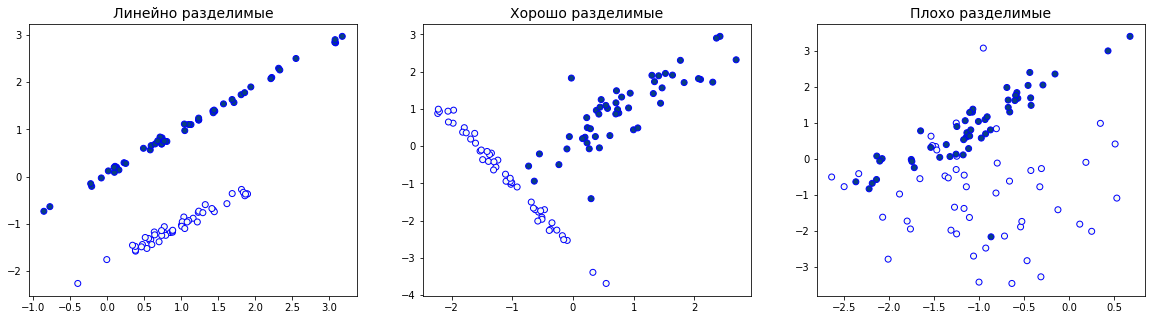

In [81]:
X_1, y_1 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes = 2, n_clusters_per_class=1, \
                             random_state=42)
y_1 = y_1 * 2

X_2, y_2 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes = 2, n_clusters_per_class=1, \
                               random_state=55)
y_2 = y_2 * 2

X_3, y_3 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes = 2, n_clusters_per_class=1, \
                               random_state=460)
y_3 = y_3 * 2

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].scatter(X_1[:, 0], X_1[:, 1], c = y_1, cmap='GnBu', edgecolor='blue')
ax[1].scatter(X_2[:, 0], X_2[:, 1], c = y_2, cmap='GnBu', edgecolor='blue')
ax[2].scatter(X_3[:, 0], X_3[:, 1], c = y_3, cmap='GnBu', edgecolor='blue')

ax[0].set_title('Линейно разделимые', fontsize = 14)
ax[1].set_title('Хорошо разделимые', fontsize = 14)
ax[2].set_title('Плохо разделимые', fontsize = 14)

Не успела сделать больше:( (Если можно будет, доделаю позже)